<center> <h1>BAIT 508 Project: Social Media Analytics</h1> </center>

## Part A [Keyword Selection and Data Collection]

In [308]:
import tweepy
import json
import time
import string
import pickle
from TwitterCollector import TwitterCollector
from datetime import datetime
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from PIL import Image
from textblob import TextBlob

In [2]:
bearer_token = r"AAAAAAAAAAAAAAAAAAAAAO%2FMhAEAAAAAv3Zwkt%2FgTet%2BXZjAV5Yg4PnyXLg%3DcXelBuKvQz0036uUxcudckQb1wqydVAlGrBXx1Afhc12w36yLO"

# initialize a TwitterCollector instance
tc = TwitterCollector(bearer_token = bearer_token)

### 1. Pick one keyword
### 2. Collect 10K recent tweets

In [ ]:
keyword = 'hawaii'
recent_tweets = tc.fetch_recent_tweets(query = keyword  # specify the search query
                                        , tweets_cnt = 10000  # specify the number of tweets you want to collect
                                        , save_result = True  # if True, the tweets will be automatically saved to a json file apart from the value returned
                                        , file_name = 'hawaii.json'  # this will be the file name
                                        )

In [3]:
f = open('hawaii.json','r')
recent_tweets = json.load(f)

In [4]:
len(recent_tweets['tweets'])

10000

### 3. Gte the list of unique author IDs

In [5]:
unique_author_id = []
#author = {}
for i in range(len(recent_tweets['tweets'])):
    unique_author_id.append(recent_tweets['tweets'][i]['author_id'])

unique_author_id = list(set(unique_author_id))

print(len(unique_author_id))
print(unique_author_id[0:10])

7844
['1927843766', '1427579764047446019', '1186093142749171712', '1098097499649171456', '1383740807841157121', '1573003698900459527', '1178894599907094528', '1029222203710038017', '1224781504489967623', '1571869410318745600']


In [6]:
recent_tweets['tweets'][0]

{'created_at': '2022-09-30T18:28:59.000Z',
 'possibly_sensitive': False,
 'source': 'Twitter for iPhone',
 'edit_history_tweet_ids': ['1575915629701234689'],
 'entities': {'annotations': [{'start': 11,
    'end': 16,
    'probability': 0.7841,
    'type': 'Place',
    'normalized_text': 'Hawaii'}],
  'mentions': [{'start': 0,
    'end': 10,
    'username': 'jen_moxon',
    'id': '851881105783476228'}]},
 'author_id': '1096306675',
 'in_reply_to_user_id': '851881105783476228',
 'lang': 'en',
 'id': '1575915629701234689',
 'context_annotations': [{'domain': {'id': '159',
    'name': 'States',
    'description': 'States, provinces, or prefectures, like California or Fukushima Prefecture'},
   'entity': {'id': '856861547208916992',
    'name': 'Hawaii',
    'description': 'Hawaii'}}],
 'referenced_tweets': [{'type': 'replied_to', 'id': '1575889645220417536'}],
 'public_metrics': {'retweet_count': 0,
  'reply_count': 0,
  'like_count': 0,
  'quote_count': 0},
 'text': '@jen_moxon Hawaii'}

### 4. Use the IDs collect author information

In [15]:
author_info = {}
for i, author_id in enumerate(unique_author_id):
    try:
        author_info[author_id] = tc.fetch_author_info(author_id)
        if i % 1000 == 0:
            print("Have processed " + str(i))
    
    except tweepy.TooManyRequests:
        print('Wating for rate limit')
        time.sleep(15*60) 

Wating for rate limit
Wating for rate limit
Wating for rate limit
Wating for rate limit
Have processed 1000
Wating for rate limit
Wating for rate limit
Wating for rate limit
Have processed 2000
Wating for rate limit
Wating for rate limit
Wating for rate limit
Have processed 3000
Wating for rate limit
Wating for rate limit
Wating for rate limit
Wating for rate limit
Have processed 4000
Wating for rate limit
Wating for rate limit
Wating for rate limit
Have processed 5000
Wating for rate limit
Wating for rate limit
Wating for rate limit
Have processed 6000
Wating for rate limit
Wating for rate limit
Wating for rate limit
Wating for rate limit
Have processed 7000
Wating for rate limit
Wating for rate limit
Wating for rate limit


In [33]:
for k, v in author_info.items():
    print(f"The author id is: {k}")
    print(f"The corresponding author info is: {v}")
    break

The author id is: 1427579764047446019
The corresponding author info is: {'created_at': '2021-08-17T10:35:52.000Z', 'verified': False, 'name': 'Min Min Jan', 'description': 'insta💝minamiinamiiina\n \n🌍Iran\n🏙Tehran', 'id': '1427579764047446019', 'public_metrics': {'followers_count': 51, 'following_count': 96, 'tweet_count': 1592, 'listed_count': 0}, 'username': 'MinMinJan4'}


## Part B [Preliminary Analysis]

### 1. Ten most popular words with and without stop words

In [22]:
puncs = string.punctuation
dgts = string.digits
table_dp = str.maketrans(dgts + puncs, (len(dgts)+len(puncs)) * " ")

In [24]:
words = ''
for i in range(len(recent_tweets['tweets'])):
    words += ' '  # This line is to solve the problem of appending without a space
    words += recent_tweets['tweets'][i]['text'].lower().translate(table_dp)

split_words = words.split()

In [27]:
most_common_withstop = Counter(split_words)
most_common_withstop.most_common(10)

[('hawaii', 8790),
 ('rt', 6193),
 ('t', 6000),
 ('https', 5682),
 ('co', 5584),
 ('the', 4455),
 ('to', 3367),
 ('of', 2930),
 ('in', 2753),
 ('and', 2567)]

In [30]:
with open('stopwords.pkl', 'rb') as f:
    stopwords = pickle.load(f)

stopwords.append('rt')
stopwords.append('https')

In [31]:
clean_words = [w for w in split_words if w not in stopwords and len(w) > 1]
most_common_withoutstop = Counter(clean_words)
most_common_withoutstop.most_common(10)

[('hawaii', 8790),
 ('co', 5584),
 ('views', 1053),
 ('magical', 995),
 ('us', 908),
 ('earthquake', 819),
 ('one', 584),
 ('know', 564),
 ('km', 559),
 ('japan', 485)]

### 2. Ten most popular hastags

In [60]:
all_words = ''
for i in range(len(recent_tweets['tweets'])):
    all_words += ' '  # This line is to solve the problem of appending without a space
    all_words += recent_tweets['tweets'][i]['text']

all_word = all_words.split()

In [61]:
hashtag = []
for word in all_word:
    if '#' in word:
        hashtag.append(word)

In [62]:
most_common_hashtag = Counter(hashtag)
most_common_hashtag.most_common(10)

[('#Hawaii', 436),
 ('#earthquake', 216),
 ('#hawaii', 180),
 ('#UnitedStates', 110),
 ('#data', 109),
 ('#earthb0t', 108),
 ('#noaa', 108),
 ('#greatshakeout', 108),
 ('#LetsBeSafe', 108),
 ('#OpenData', 108)]

### 3. Ten most frequently mentioned usernames

In [337]:
username = []
for word in all_word:
    if '@' in word and len(word) != 1:
        username.append(word)

In [338]:
most_common_username = Counter(username)
most_common_username.most_common(10)

[('@views_magical:', 978),
 ('@Outrojules:', 458),
 ('@raissawriter:', 454),
 ('@JackPosobiec:', 310),
 ('@LeenaJuarej1:', 188),
 ('@ChristinaJedra:', 163),
 ('@SilverSpookGuy:', 143),
 ('@EarthPicszz:', 132),
 ('@elonmusk:', 128),
 ('@abe_elimimian', 111)]

### 4. Three most common sources of the tweets

In [335]:
twitter_source = {}
for i in range(len(recent_tweets['tweets'])):
    twitter_source[recent_tweets['tweets'][i]['source']] = \
    twitter_source.get(recent_tweets['tweets'][i]['source'], 0) + 1

sorted(twitter_source.items(), key = lambda x:x[1], reverse = True)[:3]

[('Twitter for iPhone', 3452),
 ('Twitter for Android', 3018),
 ('Twitter Web App', 1990)]

### 5. Line chart to show the time trend of tweet counts

In [216]:
print(recent_tweets['tweets'][0]['created_at'])
print(recent_tweets['tweets'][0]['created_at'][11:19])
print(recent_tweets['tweets'][9999]['created_at'][11:19])

2022-09-30T18:28:59.000Z
18:28:59
01:41:23


In [205]:
time_range = []
temp = '01:50:00'
while True:
    if temp == '18:40:00':
        break
    time_range.append(temp)
    checkm = int(temp[3:5])
    if checkm <= 40:
        temp = temp[0:3] + str(checkm + 10) + temp[5:8]
    elif checkm == 50:
        checkh = int(temp[0:2])
        if checkh <= 8:
            temp = '0'+str(checkh+1) + ':00' + temp[5:8]
        elif checkh >= 9:
            temp = str(checkh+1) + ':00' + temp[5:8]

In [206]:
count = [0]*len(time_range)
j = 0
new_count = 0
for i in range(len(recent_tweets['tweets'])-1, -1, -1):
    if recent_tweets['tweets'][i]['created_at'][11:19] <= time_range[j]:
        count[j] += 1
    elif recent_tweets['tweets'][i]['created_at'][11:19] > time_range[j]:
        j += 1
        count[j] += 1
    new_count += 1

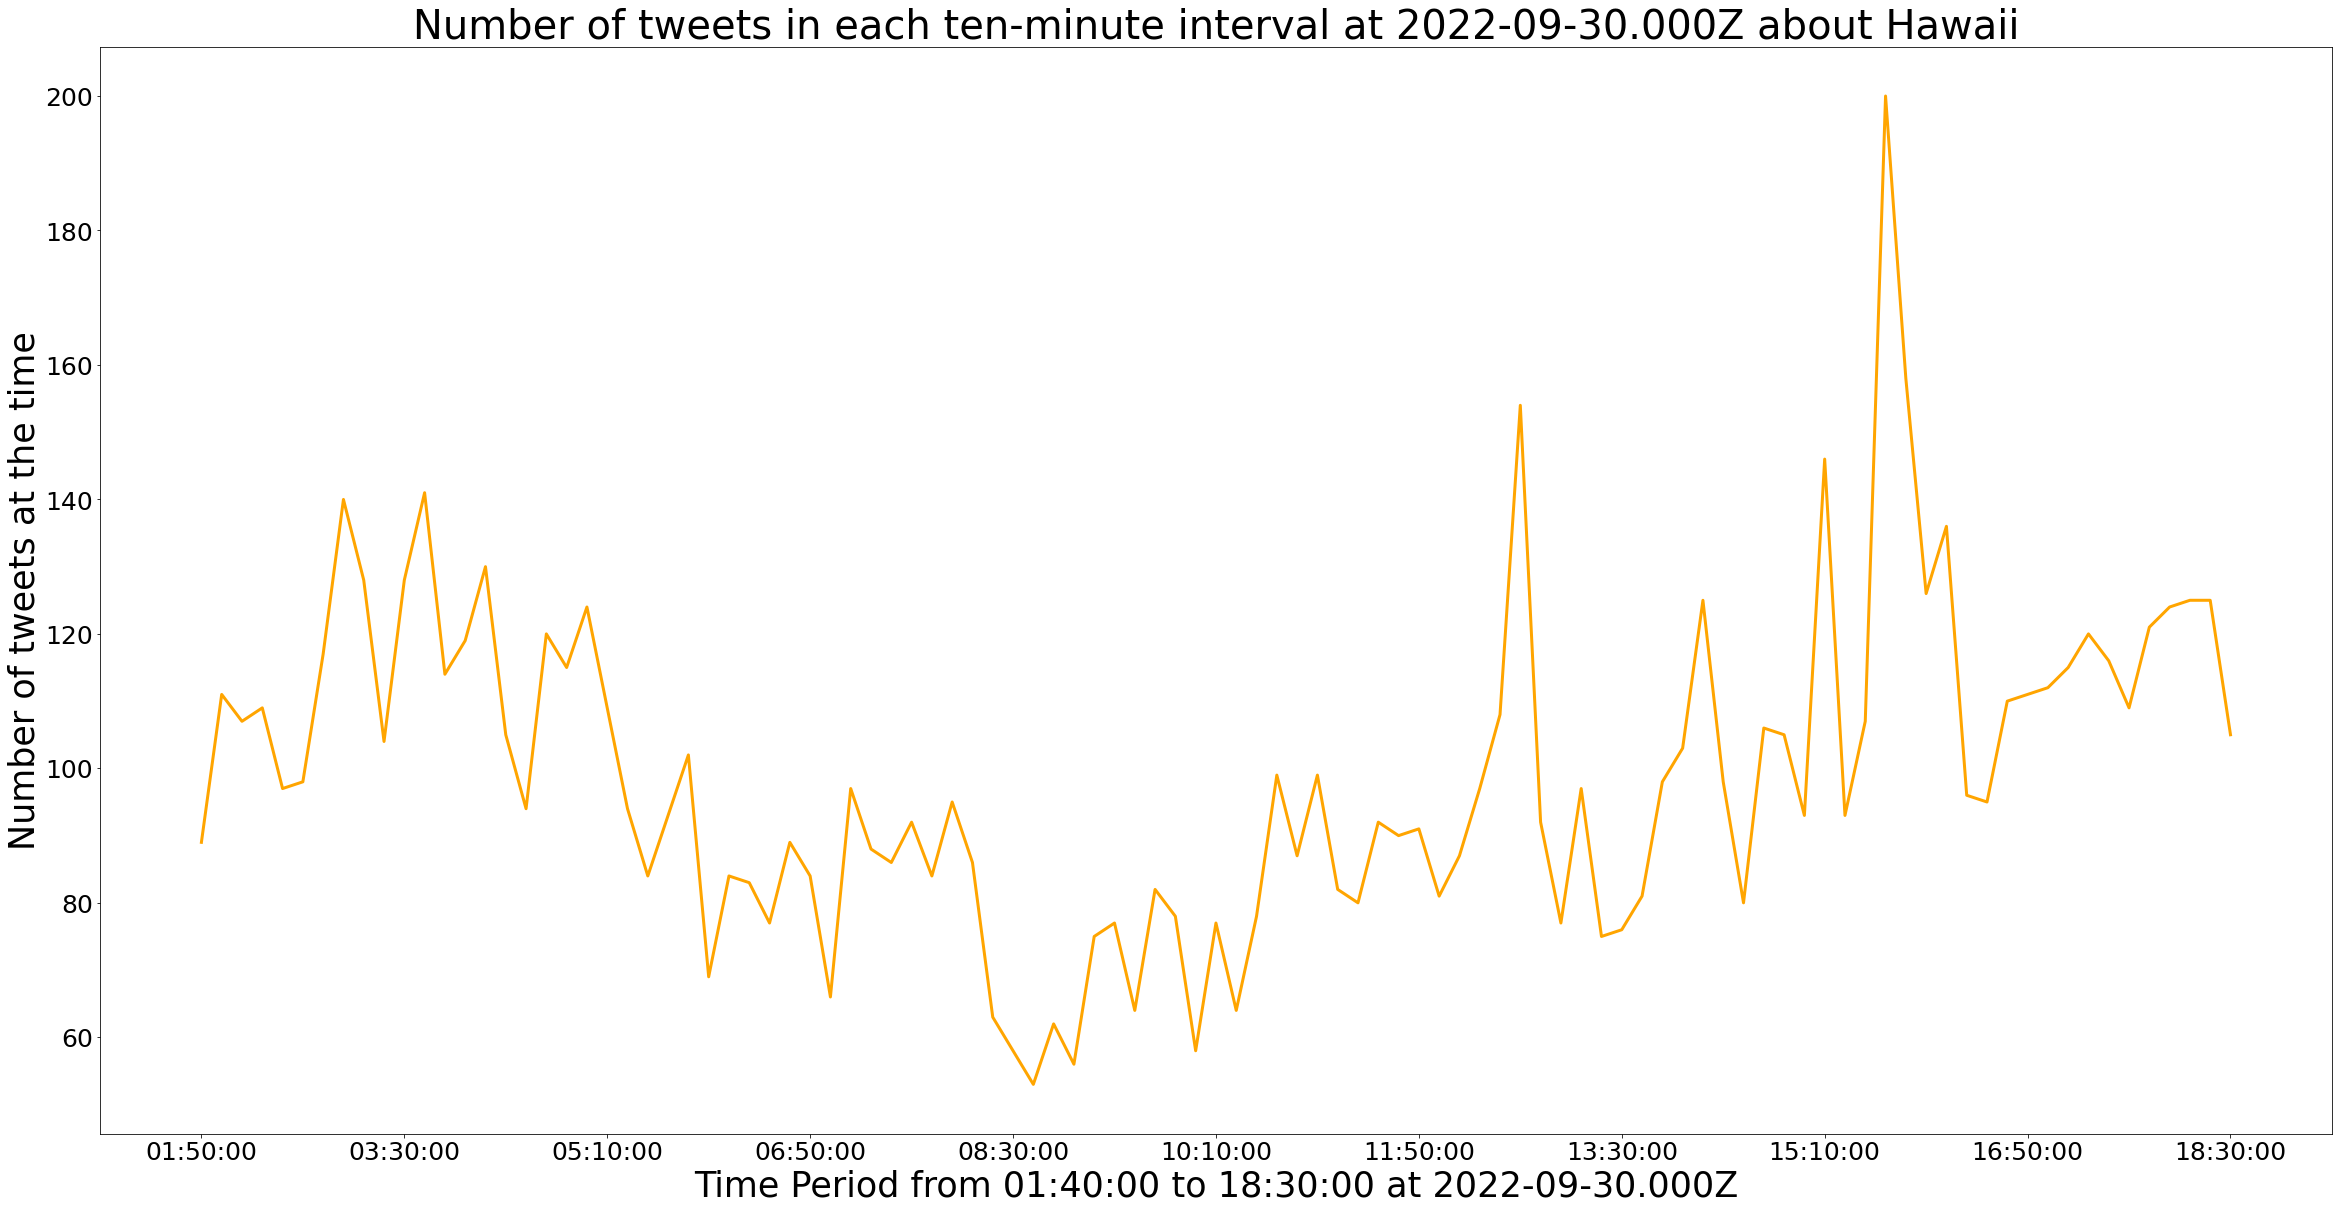

In [325]:
# Set the axis
# Reference: https://matplotlib.org/stable/api/ticker_api.html

plt.figure(figsize = (40, 20))
plt.plot(time_range, count, color = 'orange', linewidth = 3)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Time Period from 01:40:00 to 18:30:00 at 2022-09-30.000Z", fontsize = 35)
plt.ylabel("Number of tweets at the time", fontsize = 35)
plt.title("Number of tweets in each ten-minute interval at 2022-09-30.000Z about Hawaii", fontsize = 40)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.savefig('time trend of tweet counts.png')
plt.show();

### 6. Three most influential tweets

In [220]:
tweets = []
quote = []
reply = []
retweet = []
like = []

for i in range(len(recent_tweets['tweets'])):
    tweets.append(recent_tweets['tweets'][i]['text'])
    quote.append(recent_tweets['tweets'][i]['public_metrics']['quote_count'])
    reply.append(recent_tweets['tweets'][i]['public_metrics']['reply_count'])
    retweet.append(recent_tweets['tweets'][i]['public_metrics']['retweet_count'])
    like.append(recent_tweets['tweets'][i]['public_metrics']['like_count'])
    
print(len(tweets), len(quote), len(reply), len(retweet), len(like))

10000 10000 10000 10000 10000


In [224]:
# Zip list in python
# Reference: https://stackoverflow.com/questions/13704860/zip-lists-in-python

influential_tweets = pd.DataFrame(list(zip(tweets, quote, reply, retweet, like)),
                                 columns = ['tweets', 'quote', 'reply', 'retweet', 'like'])

influential_tweets.head()

,tweets,quote,reply,retweet,like
0,@jen_moxon Hawaii,0,0,0,0
1,@hawaii_bbw 💓💓💓💓💓💓,0,0,0,0
2,@JCTretter @Michael_Fabiano Coach already said...,0,0,0,0
3,RT @DullVivid: Fiona Fawnbags went to Hawaii b...,0,0,87,0
4,"@kaddastrophe @FiFaFu Kommt, jetzt vertragt eu...",0,0,0,1


In [273]:
cols = ['quote', 'reply', 'retweet', 'like']
influential_tweets['influential_num'] = influential_tweets[cols].sum(axis = 1)
influential_tweets.sort_values('influential_num', ascending = False)[['tweets']][:10]

,tweets
3882,RT @PamKeithFL: Fun fact: \n\nGambling is ille...
8760,RT @PamKeithFL: Fun fact: \n\nGambling is ille...
4059,RT @PamKeithFL: Fun fact: \n\nGambling is ille...
3121,RT @PamKeithFL: Fun fact: \n\nGambling is ille...
4021,RT @PamKeithFL: Fun fact: \n\nGambling is ille...
4080,RT @PamKeithFL: Fun fact: \n\nGambling is ille...
139,RT @earth_locations: Hawaii https://t.co/RoBk7...
2877,RT @arashi_livefilm: ⠀⠀\n🤙ONE NIGHT ONLY in Ha...
36,RT @SilverSpookGuy: The US banned Hawaiian lan...
6797,RT @ezralevant: There were six people in a hou...


In [333]:
influential_tweets.iloc[[3882, 139, 2877],[0, 5]]

,tweets,influential_num
3882,RT @PamKeithFL: Fun fact: \n\nGambling is ille...,71994
139,RT @earth_locations: Hawaii https://t.co/RoBk7...,19154
2877,RT @arashi_livefilm: ⠀⠀\n🤙ONE NIGHT ONLY in Ha...,17586


### 7. Frequently tweeting authors

In [243]:
id_d = {}
for i in range(len(recent_tweets['tweets'])):
    id_d[recent_tweets['tweets'][i]['author_id']] = id_d.get(recent_tweets['tweets'][i]['author_id'], 0) + 1

sorted(id_d.items(), key = lambda x:x[1], reverse = True)[:3]

[('1105820183778807808', 100), ('581146746', 98), ('2238942602', 97)]

In [256]:
list_id = ['1105820183778807808', '581146746', '2238942602']
for id in list_id:
    print(id, author_info[id]['username'])

1105820183778807808 HawaiiQuakes
581146746 kanjecisel
2238942602 kicksomedust


### 8. Influential authors

In [257]:
author_info['581146746']

{'description': '💎🔆Dm yok',
 'created_at': '2012-05-15T17:03:59.000Z',
 'id': '581146746',
 'public_metrics': {'followers_count': 2369,
  'following_count': 5007,
  'tweet_count': 551977,
  'listed_count': 3},
 'verified': False,
 'username': 'kanjecisel',
 'name': '🔆👁8️⃣Lolan Kraliçesi Xiaohe🧚\u200d♀️1️⃣9️⃣'}

In [269]:
author = []
followers = []
following = []
listed = []
tweet = []

for v in author_info.values():
    try:
        author.append(v['username'])
        followers.append(v['public_metrics']['followers_count'])
        following.append(v['public_metrics']['following_count'])
        listed.append(v['public_metrics']['listed_count'])
        tweet.append(v['public_metrics']['tweet_count'])
    except:
        pass
    
print(len(author), len(followers), len(following), len(listed), len(tweet))

7776 7776 7776 7776 7776


In [270]:
influential_author = pd.DataFrame(list(zip(author, followers, following, listed, tweet)),
                                 columns = ['author', 'followers', 'following', 'listed', 'tweet'])

influential_author.head()

,author,followers,following,listed,tweet
0,MinMinJan4,51,96,0,1592
1,MyTranquilitee,1441,25,11,3262
2,Sullivan_42,173,254,0,107
3,BlomTee,1089,1640,0,8247
4,terelly_keren,19,87,0,172


In [331]:
cols = ['followers', 'following', 'listed', 'tweet']
influential_author['influential_num'] = influential_author[cols].sum(axis = 1)
influential_author.sort_values('influential_num', ascending = False)[['author','influential_num']][:3]

,author,influential_num
1280,japan_lawson,110006318
7251,suntory,21530673
1079,Kirin_Brewery,18542414


## Part C [Word Cloud]

In [283]:
text = ''
for word in clean_words:
    text = text + ' ' + word

In [301]:
# Use the code and way to apply a picture as mask to wordcloud
# Referecne: https://stackoverflow.com/questions/50435433/wordcloud-words-not-fitting-to-mask
bg_pic = np.array(Image.open('hawaii_island.jpg'))

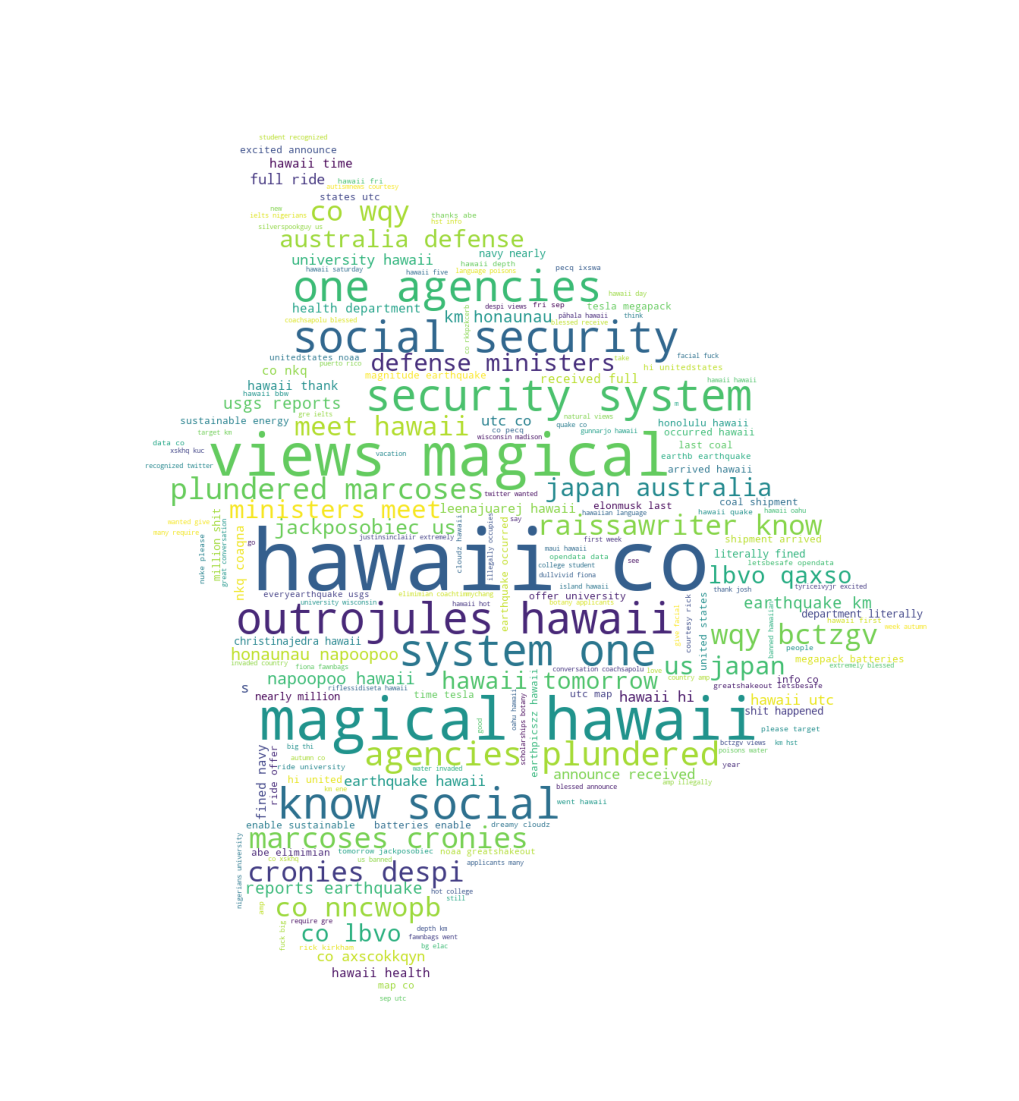

In [328]:
wordcloud = WordCloud(mask = bg_pic, 
                      background_color = 'white',
                      stopwords = STOPWORDS, 
                      width=800, 
                      max_words = 200,
                      height=400).generate(text) 

# Display the generated image:
plt.figure(figsize=(40,20)) # set up figure size
plt.imshow(wordcloud) # word cloud image show
plt.axis("off") # turn on axis
plt.show()  # show in Jupyter notebook

## Part D [Sentiment Analysis]

### 1. Average polarity and subjectivity score

In [310]:
polarity = []
subjectivity = []
for i in range(len(recent_tweets['tweets'])):
    tb = TextBlob(recent_tweets['tweets'][i]['text'])
    polarity.append(tb.sentiment.polarity)
    subjectivity.append(tb.sentiment.subjectivity)

print(f"Average polarity is: {sum(polarity)/len(polarity)}")
print(f"Average subjectivity is: {sum(subjectivity)/len(subjectivity)}")

Average polarity is: 0.06753195338127088
Average subjectivity is: 0.2037759947376013


### 2. Histograms of polarity and subjectivity

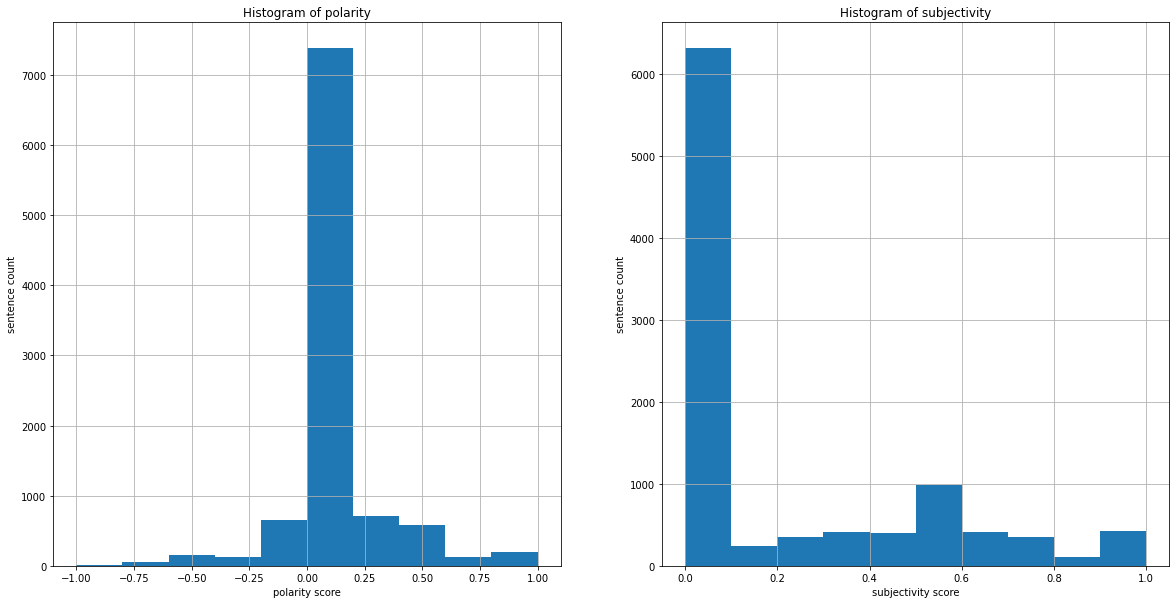

In [339]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.hist(polarity, bins=10)
plt.xlabel('polarity score')
plt.ylabel('sentence count')
plt.title('Histogram of polarity')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(subjectivity, bins=10)
plt.xlabel('subjectivity score')
plt.ylabel('sentence count')
plt.title('Histogram of subjectivity')
plt.grid(True)
plt.savefig('histogram of polarity and subjectivity.png')
plt.show();

### 3. Most positive and negative tweets

In [314]:
max_index = polarity.index(max(polarity))
min_index = polarity.index(min(polarity))

In [319]:
print(f"Highest polarity score tweet: {recent_tweets['tweets'][max_index]['text']}")

Highest polarity score tweet: whitelist PERFECT @Anychain5 @asiyasu3 @RunGoodRussell @CryptoSerpent42 @pokrypto @AlexBaghdjian @chsecrwfrd @ir_re_al @heybjoern @hawaii_nft @ZoeSong77 @chillingonmoon @CryptoGunnency https://t.co/u5jrAVrPzN


In [320]:
print(f"Lowest polarity score tweet: {recent_tweets['tweets'][min_index]['text']}")

Lowest polarity score tweet: RT @Yerimieupdates: [INFO] YERI's Youtube channel hit 500k views!

Stream YERI’s holiday vlog in hawaii🏝 #2 here! We're so close to 100k vi…
